# Explore here

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")

df = pd.DataFrame(total_data)
total_data.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
# eliminate any duplicates
df.drop(["id", "host_id", "name", "last_review", "reviews_per_month", "host_name", "latitude", "longitude", "availability_365"], axis= 1, inplace= True)
df


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,Brooklyn,Kensington,Private room,149,1,9,6
1,Manhattan,Midtown,Entire home/apt,225,1,45,2
2,Manhattan,Harlem,Private room,150,3,0,1
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1
...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,Private room,70,2,0,2
48891,Brooklyn,Bushwick,Private room,40,4,0,2
48892,Manhattan,Harlem,Entire home/apt,115,10,0,1
48893,Manhattan,Hell's Kitchen,Shared room,55,1,0,6


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   neighbourhood_group             48895 non-null  object
 1   neighbourhood                   48895 non-null  object
 2   room_type                       48895 non-null  object
 3   price                           48895 non-null  int64 
 4   minimum_nights                  48895 non-null  int64 
 5   number_of_reviews               48895 non-null  int64 
 6   calculated_host_listings_count  48895 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 2.6+ MB


In [29]:
df.shape

(48895, 7)

In [30]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count'],
      dtype='object')

In [31]:
df.isnull

<bound method DataFrame.isnull of       neighbourhood_group       neighbourhood        room_type  price  \
0                Brooklyn          Kensington     Private room    149   
1               Manhattan             Midtown  Entire home/apt    225   
2               Manhattan              Harlem     Private room    150   
3                Brooklyn        Clinton Hill  Entire home/apt     89   
4               Manhattan         East Harlem  Entire home/apt     80   
...                   ...                 ...              ...    ...   
48890            Brooklyn  Bedford-Stuyvesant     Private room     70   
48891            Brooklyn            Bushwick     Private room     40   
48892           Manhattan              Harlem  Entire home/apt    115   
48893           Manhattan      Hell's Kitchen      Shared room     55   
48894           Manhattan      Hell's Kitchen     Private room     90   

       minimum_nights  number_of_reviews  calculated_host_listings_count  
0             

8 Categorical Columns: (id, name, host_id, host_name, neighborhood_group, neighbourhood, room_type, availability_365)
8 Numerical Columns: (latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, calculated_host_listings_count)

In [ ]:
df.nunique()

host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [ ]:
# Different types of 'rooms' available
df['room_type'].value_counts()

room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64

The least expensive property is 0, while the most expensive is 10000.  Finally, the average price within the data set is 152.7206871868289

price_range
0-50           5016
51-100        16850
101-150       10033
151-200        7211
201-250        3559
251-300        2308
301-500        2683
501-1000        937
1001-2000       188
2001-4000        75
4001-6000        17
6001-8000        10
8001-10000        5
Name: count, dtype: int64


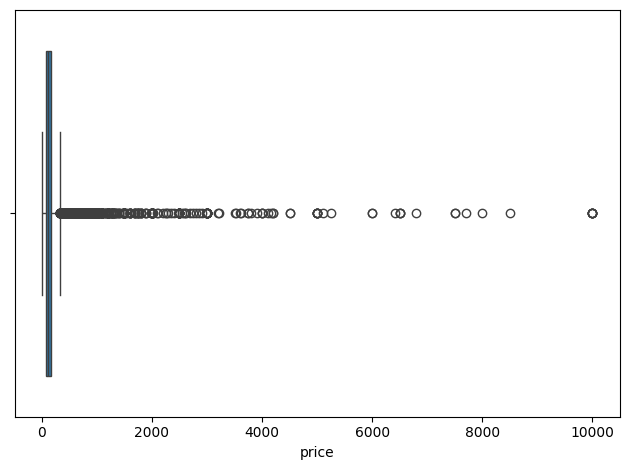

In [36]:
# Analysis of prices
min_price = df['price'].min()
max_price = df['price'].max()
mean_price = df['price'].mean()
print(f"The least expensive property is {min_price}, while the most expensive is {max_price}.  Finally, the average price within the data set is {mean_price}")

# Replacing the 10 listings with a value of 0 for price with the median price ($152.72)
df['price'] = df['price'].replace(0, mean_price)

sns.boxplot(x=df['price'])

# Looking into the ranges of prices
bins = [0, 50, 100, 150, 200, 250, 300, 500, 1000, 2000, 4000, 6000, 8000, 10000]
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-500', '501-1000', '1001-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000' ]
df['price_range'] = pd.cut(df['price'], bins=bins, labels=bin_labels, right=False)
value_counts = df['price_range'].value_counts().sort_index()
plt.tight_layout()
print()
print(value_counts)






In [37]:
df[df['price'].duplicated()].sort_values(by="price").head(25)

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,price_range
23256,Manhattan,Upper East Side,Entire home/apt,10.0,3,10,1,0-50
47218,Brooklyn,Bushwick,Private room,10.0,1,2,1,0-50
22287,Manhattan,SoHo,Private room,10.0,5,2,1,0-50
24100,Manhattan,Hell's Kitchen,Shared room,10.0,1,2,1,0-50
35601,Brooklyn,Bedford-Stuyvesant,Entire home/apt,10.0,3,5,1,0-50
31407,Manhattan,Kips Bay,Private room,10.0,5,42,1,0-50
22261,Brooklyn,Bushwick,Private room,10.0,5,0,1,0-50
31066,Manhattan,Upper West Side,Private room,10.0,1,2,1,0-50
32810,Brooklyn,Sunset Park,Entire home/apt,10.0,1,14,1,0-50
34446,Bronx,Highbridge,Private room,10.0,1,0,1,0-50


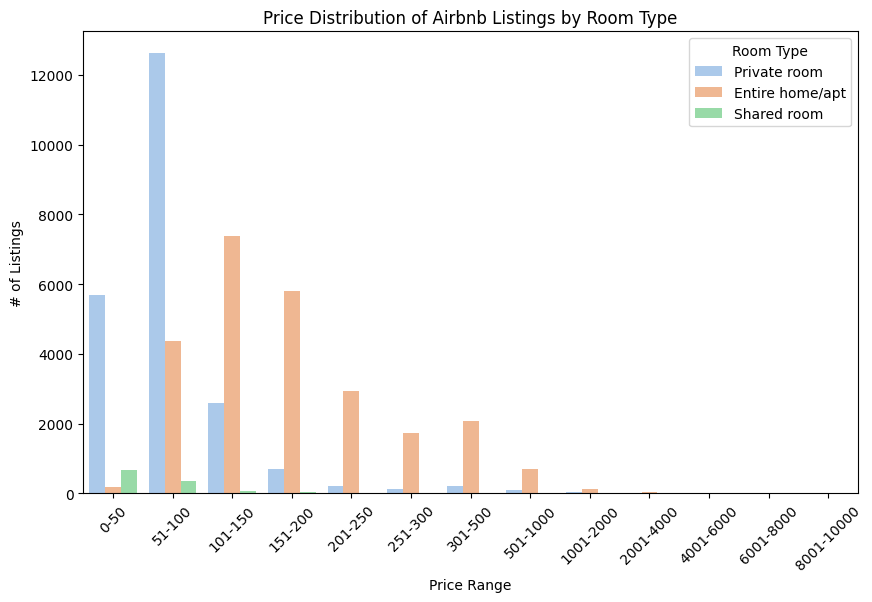

In [ ]:
# Now let us separate the distinct categorical types of rentals and their data; shared room, private room, or the entire apartment.
df['room_type_encoded'], unique_room_types = pd.factorize(df['room_type'])

bins = [0, 50, 100, 150, 200, 250, 300, 500, 1000, 2000, 4000, 6000, 8000, 10000]
bin_labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-500', '501-1000', '1001-2000', '2001-4000', '4001-6000', '6001-8000', '8001-10000' ]

df['price_range'] = pd.cut(df['price'], bins=bins, labels=bin_labels)

# Filter for 'Private room' and 'Entire home/apt' only
filtered_df = df[df['room_type'].isin(['Shared Room', 'Private Room', 'Entire Home/Apt'])]


# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='price_range', hue='room_type_encoded', palette='pastel')

plt.legend(title='Room Type', labels=unique_room_types)
plt.xticks(rotation=45)
plt.title('Price Distribution of Airbnb Listings by Room Type')
plt.xlabel('Price Range')
plt.ylabel('# of Listings')

plt.show()

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64

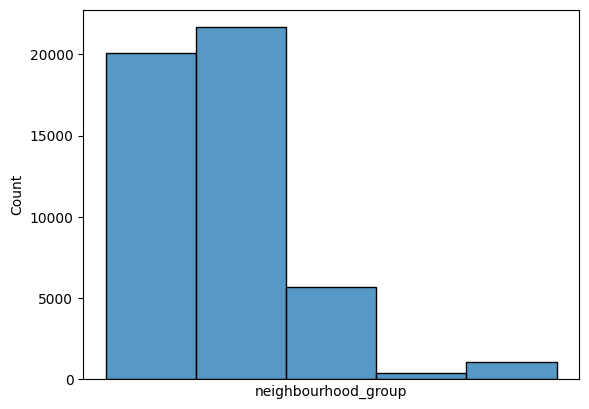

In [ ]:
# Histogram of neighborhood groups
sns.histplot(data = df, x = "neighbourhood_group").set_xticks([])
# Where these properties are located throughout NY
df['neighbourhood_group'].value_counts()


In [ ]:
'''
From Monday:
You should have familiarized yourself with the dataset. This includes:
- Inspecting some statistics
- Dropping irrelevant columns
- Identifying your target column (in other words: what feature do we want our model to try to predict?)
- Inspect the data type of columns and cast columns to the correct data type as necessary
- Develop some visualizations as needed

What the focus for today should be:
1) Split your dataset into train/test sets first!!
2) Impute missing values in both your train and test sets using metrics that were calculated from your train set
3) Scale columns if necessary for both your train and test sets using metrics that were calculated from your train set.
4) Impute outliers if necessary but remember to use metrics from the train set!!
5) Feature selection
'''